# [Thanatos Top Laner DWG/CL](https://lol.fandom.com/wiki/Thanatos_(Park_Seung-gyu))
---------------------------
O objetivo desse notebook é realizar uma analise exploratorio do jogador Thanatos (Park Seung-gyu), atualmente top laner academyda DWG academy.

## Importando libs utilizadas.

In [1]:
import mwclient
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Preparandos dados...

#### Fazendo query na API da leaguepedia.

In [2]:
site = mwclient.Site('lol.fandom.com', path='/')


scb_players = site.api('cargoquery',
                        limit='max',
                        tables='ScoreboardGames=SG, ScoreboardPlayers=SP',
                        fields="""
                            SG.Tournament, 
                            SG.DateTime_UTC, 
                            SG.Gamelength_Number, 
                            SG.N_GameInMatch, 
                            SG.UniqueLine, 
                            SP.UniqueGame, 
                            SP.Name, SP.Champion, 
                            SP.Kills, 
                            SP.Deaths, 
                            SP.Assists, 
                            SP.Gold, 
                            SP.CS, 
                            SP.PlayerWin, 
                            SP.Role,
                            SP.Side, 
                            SP.Items,
                            SP.DamageToChampions 
                            """,
                        where="SP.Name like 'Thanatos' and SP.Role like 'Top'",
                        join_on='SP.UniqueGame = SG.UniqueLine',
                        order_by='SG.DateTime_UTC',
                        )

#### Salvando resultado em JSON.

In [3]:
jsonDict = json.dumps(scb_players['cargoquery'], indent=2)
jsonFile = open('data/' + 'scb_players.json', 'w')
jsonFile.write(jsonDict)

15461

#### Lendo o JSON e transformando em um dataframe do pandas.

In [4]:
with open('data/' + 'scb_players.json','r') as f:
    data = json.loads(f.read())
    
df = pd.json_normalize(data, max_level=1)

#### Renomeando colunas.

In [5]:
df.set_axis(['tournament', 'datetime_utc', 'gamelength_number',
       'n_gameinmatch', 'uniqueline', 'uniquegame',
       'name', 'champion', 'kills', 'deaths',
       'assists', 'gold', 'cs', 'playerwin',
       'role', 'side', 'items', 'damage_champions',
       'datetime_utc_precision'], axis=1, inplace=True)

In [6]:
df

,tournament,datetime_utc,gamelength_number,n_gameinmatch,uniqueline,uniquegame,name,champion,kills,deaths,assists,gold,cs,playerwin,role,side,items,damage_champions,datetime_utc_precision
0,LCK CL 2021 Spring,2021-01-18 10:14:00,31.083333333333,1,LCK CL/2021 Season/Spring Season/Scoreboards_3_1,LCK CL/2021 Season/Spring Season/Scoreboards_3_1,Thanatos,Renekton,4,1,1,14689,330,Yes,Top,1,"Broken Stopwatch,Sterak's Gage,Goredrinker,Pla...",15428,0
1,LCK CL 2021 Spring,2021-01-19 08:48:00,33.183333333333,1,LCK CL/2021 Season/Spring Season/Scoreboards_7_1,LCK CL/2021 Season/Spring Season/Scoreboards_7_1,Thanatos,Gnar,3,2,7,15655,340,Yes,Top,2,"Black Cleaver,Divine Sunderer,,Force of Nature...",13642,0
2,LCK CL 2021 Spring,2021-01-25 07:47:00,25.066666666667,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Camille,1,2,1,10633,243,No,Top,1,"Guardian Angel,Trinity Force,,Ionian Boots of ...",9577,0
3,LCK CL 2021 Spring,2021-01-26 08:45:00,27.483333333333,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Camille,2,3,2,12755,273,Yes,Top,2,"Trinity Force,Ionian Boots of Lucidity,Ravenou...",10893,0
4,LCK CL 2021 Spring,2021-02-01 07:39:00,29.5,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Camille,2,0,6,11557,234,Yes,Top,1,"Trinity Force,Ravenous Hydra,Broken Stopwatch,...",10658,0
5,LCK CL 2021 Spring,2021-02-02 07:46:00,29.066666666667,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Kennen,0,4,4,9579,240,No,Top,2,"Seeker's Armguard,Hextech Rocketbelt,Broken St...",10742,0
6,LCK CL 2021 Spring,2021-02-08 11:45:00,34.466666666667,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Renekton,2,6,4,12005,263,No,Top,1,"Cloth Armor,Broken Stopwatch,Goredrinker,Plate...",9970,0
7,LCK CL 2021 Spring,2021-02-09 11:56:00,27.25,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Ornn,1,2,1,9432,226,No,Top,2,"Warden's Mail,Kindlegem,Turbocharged Hexperime...",13163,0
8,LCK CL 2021 Spring,2021-02-16 11:00:00,29.233333333333,1,LCK CL/2021 Season/Spring Season/Scoreboards/W...,LCK CL/2021 Season/Spring Season/Scoreboards/W...,Thanatos,Aatrox,1,4,0,10157,262,No,Top,1,"Caulfield's Warhammer,,Goredrinker,Broken Stop...",7687,0
9,KeSPA Cup 2021,2021-12-10 06:07:00,32.666666666667,1,2021 LoL KeSPA Cup/Scoreboards_4_1,2021 LoL KeSPA Cup/Scoreboards_4_1,Thanatos,Renekton,3,1,8,15121,323,Yes,Top,1,"Black Cleaver,B. F. Sword,Goredrinker,Mercury'...",14067,0


#### Alterando os tipos das colunas

In [7]:
df.gamelength_number = pd.to_numeric(df.gamelength_number)
df.n_gameinmatch = pd.to_numeric(df.n_gameinmatch)
df.kills = pd.to_numeric(df.kills)
df.deaths = pd.to_numeric(df.deaths)
df.assists = pd.to_numeric(df.assists)
df.gold = pd.to_numeric(df.gold)
df.cs = pd.to_numeric(df.cs)
df.damage_champions = pd.to_numeric(df.damage_champions)
df.datetime_utc_precision = pd.to_numeric(df.datetime_utc_precision)

In [8]:
df.datetime_utc = pd.to_datetime(df.datetime_utc)

In [9]:
df.loc[df['side'] == '1', ['side']] = 'Blue'
df.loc[df['side'] == '2', ['side']] = 'Red'

In [10]:
df.loc[df['playerwin'] == 'Yes', ['playerwin']] = True
df.loc[df['playerwin'] == 'No', ['playerwin']] = False
df['playerwin'] = df['playerwin'].astype('bool')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tournament              21 non-null     object        
 1   datetime_utc            21 non-null     datetime64[ns]
 2   gamelength_number       21 non-null     float64       
 3   n_gameinmatch           21 non-null     int64         
 4   uniqueline              21 non-null     object        
 5   uniquegame              21 non-null     object        
 6   name                    21 non-null     object        
 7   champion                21 non-null     object        
 8   kills                   21 non-null     int64         
 9   deaths                  21 non-null     int64         
 10  assists                 21 non-null     int64         
 11  gold                    21 non-null     int64         
 12  cs                      21 non-null     int64       

### Criação de Novas Metricas

#### Metria: 'Dano a Campeões por Ouro Obtido'.

In [12]:
df['damange_by_gold'] = df['damage_champions'] / df['gold']
df['damange_by_gold']

0     1.050310
1     0.871415
2     0.900687
3     0.854018
4     0.922212
5     1.121411
6     0.830487
7     1.395568
8     0.756818
9     0.930296
10    1.167806
11    0.929529
12    0.761201
13    1.702515
14    0.517159
15    2.096440
16    1.114160
17    1.674384
18    1.184690
19    1.547456
20    2.042929
Name: damange_by_gold, dtype: float64

## Medias por campeão.

### Criando DataFrame

In [13]:
df_mc = df.groupby(['champion']).mean()
df_mc

,gamelength_number,n_gameinmatch,kills,deaths,assists,gold,cs,playerwin,damage_champions,datetime_utc_precision,damange_by_gold
champion,,,,,,,,,,,
Aatrox,31.166667,2.000000,2.000000,3.500000,3.000000,11420.500000,255.5,0.500000,10909.50,0.0,0.935489
Camille,27.350000,1.000000,1.666667,1.666667,3.000000,11648.333333,250.0,0.666667,10376.00,0.0,0.892305
Gnar,33.183333,1.000000,3.000000,2.000000,7.000000,15655.000000,340.0,1.000000,13642.00,0.0,0.871415
Gragas,24.650000,1.000000,2.000000,1.000000,9.000000,10289.000000,218.0,1.000000,7832.00,0.0,0.761201
Jayce,27.122222,2.333333,2.333333,2.666667,7.666667,11747.666667,229.0,0.666667,16753.00,0.0,1.403553
Kennen,32.575000,2.000000,3.750000,5.500000,6.250000,12594.750000,243.0,0.250000,19625.75,0.0,1.501633
Malphite,36.333333,3.000000,7.000000,2.000000,12.000000,14129.000000,215.0,1.000000,21864.00,0.0,1.547456
Ornn,27.250000,1.000000,1.000000,2.000000,1.000000,9432.000000,226.0,0.000000,13163.00,0.0,1.395568
Renekton,32.130000,1.200000,3.000000,2.600000,6.400000,13308.200000,277.0,0.800000,13721.80,0.0,1.006153


### Criação de Novas Metricas

##### Metrica: 'Quantidade de Jogos por Campeão'.

In [14]:
df_gc = df.groupby(['champion'])["uniquegame"].count()
df_gc

champion
Aatrox      2
Camille     3
Gnar        1
Gragas      1
Jayce       3
Kennen      4
Malphite    1
Ornn        1
Renekton    5
Name: uniquegame, dtype: int64

In [15]:
df_mc = df_mc.merge(df_gc, right_on='champion', left_on='champion')
df_mc

,gamelength_number,n_gameinmatch,kills,deaths,assists,gold,cs,playerwin,damage_champions,datetime_utc_precision,damange_by_gold,uniquegame
champion,,,,,,,,,,,,
Aatrox,31.166667,2.000000,2.000000,3.500000,3.000000,11420.500000,255.5,0.500000,10909.50,0.0,0.935489,2
Camille,27.350000,1.000000,1.666667,1.666667,3.000000,11648.333333,250.0,0.666667,10376.00,0.0,0.892305,3
Gnar,33.183333,1.000000,3.000000,2.000000,7.000000,15655.000000,340.0,1.000000,13642.00,0.0,0.871415,1
Gragas,24.650000,1.000000,2.000000,1.000000,9.000000,10289.000000,218.0,1.000000,7832.00,0.0,0.761201,1
Jayce,27.122222,2.333333,2.333333,2.666667,7.666667,11747.666667,229.0,0.666667,16753.00,0.0,1.403553,3
Kennen,32.575000,2.000000,3.750000,5.500000,6.250000,12594.750000,243.0,0.250000,19625.75,0.0,1.501633,4
Malphite,36.333333,3.000000,7.000000,2.000000,12.000000,14129.000000,215.0,1.000000,21864.00,0.0,1.547456,1
Ornn,27.250000,1.000000,1.000000,2.000000,1.000000,9432.000000,226.0,0.000000,13163.00,0.0,1.395568,1
Renekton,32.130000,1.200000,3.000000,2.600000,6.400000,13308.200000,277.0,0.800000,13721.80,0.0,1.006153,5


##### Metrica: 'Quantidade de Vitorias por Campeão'.

In [16]:
df_win = df.groupby(['champion'])["playerwin"].sum()
df_win

champion
Aatrox      1
Camille     2
Gnar        1
Gragas      1
Jayce       2
Kennen      1
Malphite    1
Ornn        0
Renekton    4
Name: playerwin, dtype: int64

In [17]:
df_mc = df_mc.merge(df_win, right_on='champion', left_on='champion')
df_mc

,gamelength_number,n_gameinmatch,kills,deaths,assists,gold,cs,playerwin_x,damage_champions,datetime_utc_precision,damange_by_gold,uniquegame,playerwin_y
champion,,,,,,,,,,,,,
Aatrox,31.166667,2.000000,2.000000,3.500000,3.000000,11420.500000,255.5,0.500000,10909.50,0.0,0.935489,2,1
Camille,27.350000,1.000000,1.666667,1.666667,3.000000,11648.333333,250.0,0.666667,10376.00,0.0,0.892305,3,2
Gnar,33.183333,1.000000,3.000000,2.000000,7.000000,15655.000000,340.0,1.000000,13642.00,0.0,0.871415,1,1
Gragas,24.650000,1.000000,2.000000,1.000000,9.000000,10289.000000,218.0,1.000000,7832.00,0.0,0.761201,1,1
Jayce,27.122222,2.333333,2.333333,2.666667,7.666667,11747.666667,229.0,0.666667,16753.00,0.0,1.403553,3,2
Kennen,32.575000,2.000000,3.750000,5.500000,6.250000,12594.750000,243.0,0.250000,19625.75,0.0,1.501633,4,1
Malphite,36.333333,3.000000,7.000000,2.000000,12.000000,14129.000000,215.0,1.000000,21864.00,0.0,1.547456,1,1
Ornn,27.250000,1.000000,1.000000,2.000000,1.000000,9432.000000,226.0,0.000000,13163.00,0.0,1.395568,1,0
Renekton,32.130000,1.200000,3.000000,2.600000,6.400000,13308.200000,277.0,0.800000,13721.80,0.0,1.006153,5,4


##### Metrica: 'Winrate'

In [18]:
df_mc['winrate'] = df_mc['playerwin_y'] / df_mc['uniquegame'] * 100
df_mc['winrate']

champion
Aatrox       50.000000
Camille      66.666667
Gnar        100.000000
Gragas      100.000000
Jayce        66.666667
Kennen       25.000000
Malphite    100.000000
Ornn          0.000000
Renekton     80.000000
Name: winrate, dtype: float64

##### Metrica: 'Dano por Minuto'.

In [19]:
df_mc['damange_by_min'] = df_mc['damage_champions'] / df_mc['gamelength_number']
df_mc['damange_by_min']

champion
Aatrox      350.037433
Camille     379.378428
Gnar        411.109995
Gragas      317.728195
Jayce       617.685375
Kennen      602.478895
Malphite    601.761468
Ornn        483.045872
Renekton    427.071273
Name: damange_by_min, dtype: float64

##### Metrica: 'CS por Minuto'

In [20]:
df_mc['cs_by_min'] = df_mc['cs'] / df_mc['gamelength_number']
df_mc['cs_by_min']

champion
Aatrox       8.197861
Camille      9.140768
Gnar        10.246107
Gragas       8.843813
Jayce        8.443261
Kennen       7.459708
Malphite     5.917431
Ornn         8.293578
Renekton     8.621226
Name: cs_by_min, dtype: float64

### Renomenado e ordenando Dataframe.

In [21]:
df_mc.rename(columns={'uniquegame' : 'games', 'playerwin_y' : 'win'}, inplace=True)

In [22]:
df_mc = df_mc[['games','winrate','gamelength_number', 'kills', 'deaths', 'assists',
       'gold', 'cs', 'cs_by_min', 'damage_champions',
       'damange_by_gold', 'damange_by_min']]

In [23]:
df_mc.reset_index(inplace=True)

In [24]:
df_mc = df_mc.round(2)

In [25]:
df_mc

,champion,games,winrate,gamelength_number,kills,deaths,assists,gold,cs,cs_by_min,damage_champions,damange_by_gold,damange_by_min
0,Aatrox,2,50.00,31.17,2.00,3.50,3.00,11420.50,255.5,8.20,10909.50,0.94,350.04
1,Camille,3,66.67,27.35,1.67,1.67,3.00,11648.33,250.0,9.14,10376.00,0.89,379.38
2,Gnar,1,100.00,33.18,3.00,2.00,7.00,15655.00,340.0,10.25,13642.00,0.87,411.11
3,Gragas,1,100.00,24.65,2.00,1.00,9.00,10289.00,218.0,8.84,7832.00,0.76,317.73
4,Jayce,3,66.67,27.12,2.33,2.67,7.67,11747.67,229.0,8.44,16753.00,1.40,617.69
5,Kennen,4,25.00,32.58,3.75,5.50,6.25,12594.75,243.0,7.46,19625.75,1.50,602.48
6,Malphite,1,100.00,36.33,7.00,2.00,12.00,14129.00,215.0,5.92,21864.00,1.55,601.76
7,Ornn,1,0.00,27.25,1.00,2.00,1.00,9432.00,226.0,8.29,13163.00,1.40,483.05
8,Renekton,5,80.00,32.13,3.00,2.60,6.40,13308.20,277.0,8.62,13721.80,1.01,427.07


### Visualização dos Dados.

#### Plot: 'Distribuição de Dano/Ouro entre Campeões'.

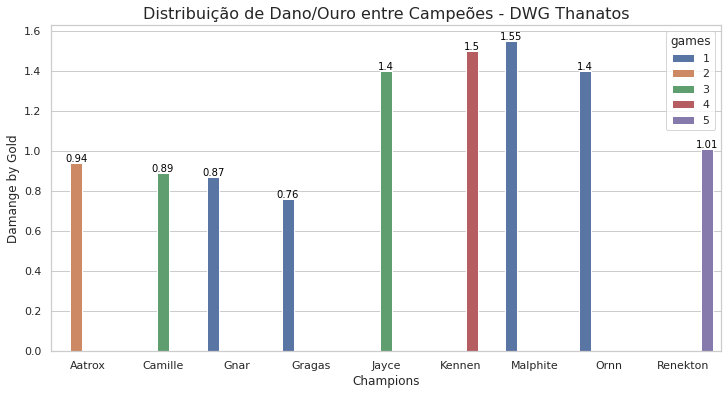

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="champion", y="damange_by_gold", hue='games', data=df_mc)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Dano/Ouro entre Campeões - DWG Thanatos', fontsize=16)
ax.set_xlabel('Champions', fontsize=12)
ax.set_ylabel('Damange by Gold', fontsize=12)
for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
fig = ax.get_figure()
fig.savefig("output.png")

In [28]:
side_win = df.groupby(['side'])["playerwin"].sum()
side_win

side
Blue    7
Red     6
Name: playerwin, dtype: int64

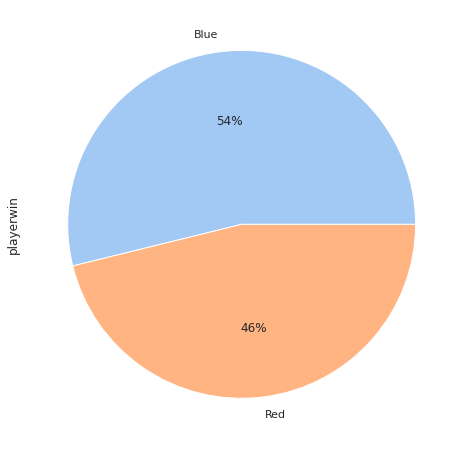

In [32]:
colors = sns.color_palette('pastel')[0:5]
ax2 = side_win.plot.pie(y='side', colors=colors, figsize=(8, 8),autopct='%.0f%%')